# Inaugural Project

Load the packages and our py file

In [14]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Importing python file HouseholdSpecializationModel
import HouseholdSpecializationModel as HSM

#Import the packages needed for the project
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [15]:
#Define the HouseholdSpecializationModelClass as model to ease the reading of the file
model = HSM.HouseholdSpecializationModelClass()

#Define the alpha and sigma lists
alpha_1 = [0.25,0.5,0.75]
sigma_1 = [0.5,1,1.5]
#Made a for loop where the values of alpha and sigma are changed in each iteration
for i in range(3):
    for j in range(3):
        model.par.alpha = alpha_1[i]
        model.par.sigma =sigma_1[j]
        #define solve_discrete() from the HouseholdSpecializationModelClass class
        results = model.solve_discrete()
        #Use solve_discrete() to calculate the ratios
        ratio_H=(1e-8+results.HF/results.HM)
        print(f' When alpha = {alpha_1[i]:.2f} and sigma = {sigma_1[j]:.2f} then HF/HM = {ratio_H:.2f}')


 When alpha = 0.25 and sigma = 0.50 then HF/HM = 0.55
 When alpha = 0.25 and sigma = 1.00 then HF/HM = 0.31
 When alpha = 0.25 and sigma = 1.50 then HF/HM = 0.21
 When alpha = 0.50 and sigma = 0.50 then HF/HM = 1.00
 When alpha = 0.50 and sigma = 1.00 then HF/HM = 1.00
 When alpha = 0.50 and sigma = 1.50 then HF/HM = 1.00
 When alpha = 0.75 and sigma = 0.50 then HF/HM = 1.83
 When alpha = 0.75 and sigma = 1.00 then HF/HM = 3.25
 When alpha = 0.75 and sigma = 1.50 then HF/HM = 4.67


When alpha=0.5, men and women are equally productive in the home. They therefore share work at home equally, since they also get the same wage in the labor market wF=wM. 

When alpha=0.25 men are more productive at home than women, women therefore work less than men at home (HF/HM)<1. 

When alpha=0.75 the opposite is true, women are more productive in the home than men, and therefore work more than men at home HF/FM>1 

When sigma increases, HF/HM decreases for alpha=0.25 and increases for alpha=0.75.  When it is easier to substitute between labor in the home, it makes sense to substitute towards the more productive of the man and the woman.


# Question 2

[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


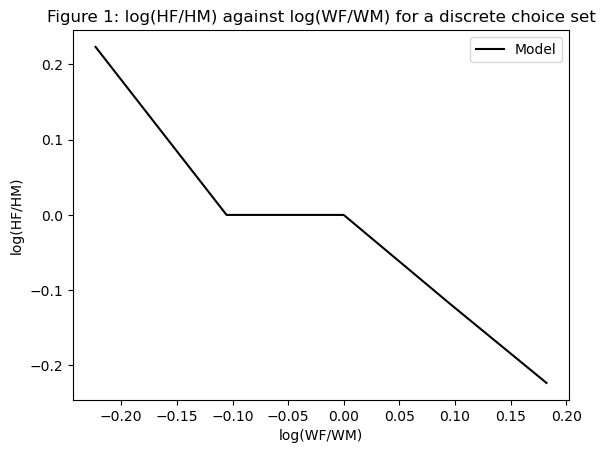

In [16]:
#Define alpha and sigma
model.par.alpha = 0.5
model.par.sigma=1

#Make two empty lists for the loop
ratioH = []
ratioW = []

#Make a loop that creates a value of ratio_H and ratio_W and append them with each iteration
for wF in model.par.wF_vec:
        model.par.wF = wF
        results = model.solve_discrete()
        ratio_H= np.log(results.HF/results.HM)
        ratioH=np.append(ratioH, ratio_H)
        ratio_W = np.log(wF/model.par.wM)
        ratioW = np.append(ratioW, ratio_W)
        

#printing the results
print(ratioH)
print(ratioW)

#Creating the graph using the Figure class
plts = HSM.Figure()
plts.title = "Figure 1: log(HF/HM) against log(WF/WM) for a discrete choice set"
plts.plot(ratioW, ratioH)


The man’s wage wM is normalized to one, so the relative wage wF/wM is just the woman’s wage wF. When the man´s and woman´s wages are equal wF=wM, the relative wage is one, so the logaritm equals 0. Hence, negative values of log(wF/wM) reflect that wF < wM, and positive values of log(wF/wM) reflect that  wF > wM.  

The negative connection between log(wF/wM) and log(HF/HM) is intuitive. When the relative wage increases the opportunity cost of the woman working at home increases, since she can get a higher wage in the labor market.  The couple therefore choose to let the woman work more in the labor market and less in the home. 

It looks like the slope (the elasticity) is around beta1=–0.5. If the relative wage increases by one percent, the relative worktime in the home decreases by one percent. 



# Question 3

We now solve the model when the choice of the household is continuous. We define the “solve()” function in the py-file and solves the model for the same values of wF as in question 2. <br><br>In Figure 2 we plot log(HF/HM) against log(wF/wM). Again, we observe a negative relationship between the relative wage of the sexes in the labor market, and the relative hours spend in the home.However, the relationship is now a smooth linear curve. <br><br>In question 2, where the choice of the household was discrete there was a “kink” in the curve. This “kink” is now gone because the household can choose continuously and not only the nearest optimal half hour.   

[ 2.23135478e-01  1.05371048e-01  3.89700942e-06 -9.53123783e-02
 -1.82308647e-01]


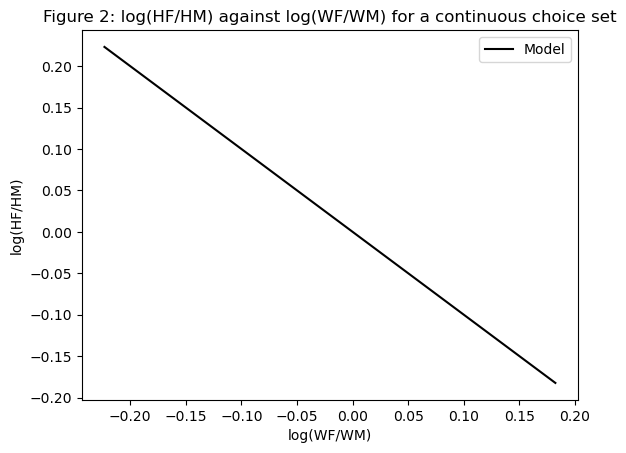

In [17]:

#Use the list for ratioW from Question 2 and define a new one for ratioH
ratioH = []

#Make the same loop as in Question 2 with the difference being that the model.solve() is called as the choice is continuous
for wF in model.par.wF_vec:
        model.par.wF = wF
        results = model.solve()
        ratio_H = np.log(results.HF/results.HM) 
        ratioH = np.append(ratioH, ratio_H)
print(ratioH)    

#plot the results
plts = HSM.Figure()
plts.title = "Figure 2: log(HF/HM) against log(WF/WM) for a continuous choice set"
plts.plot(ratioW, ratioH)


# Question 4

In the py-file we define the “solve_wF_vec” function, where we solve the model for different values of wF and return the optimal choices of the household in four vectors. In the “run_regression” function we estimate beta_0 and beta_1 by calling the “solve_wF_vec” function.<br> In the “estimate” function we solve the minimization problem, where we want beta_0 to be close to 0.4 and beta_1 close to -0.1. <br><br>
When calling the “estimate” function we get that alpha=0.98 and sigma=0.1. So for the model to fit the data we need alpha to be very close to 1, and sigma close to 0. <br>That means that the woman are much more productive in the home than the man and that the elasticity of substitution is low. <br><br>
To illustrate how the model fits the data we first solve the model for the values of wF when alpha=0.98 and sigma=0.1.<br> We then make the regression line that Siminski and Yetsenga estimated where beta_0=0.4 and beta=-0.1.<br> We then plot the regression line and choice of the household when alpha=0.98 and sigma=0.1 in the same graph.<br> We observe that the model fits the data almost perfectly. However, this is under the assumption that alpha=0.98 and sigma=0.1. In reality, we don’t believe that alpha=0.98, but should be closer to 0.5. 


/Users/oliverarogvi/Desktop/Introduction to Programming and Numerical Analysis/Samlet/projects-2023-politgrammering-1/inauguralproject/HouseholdSpecializationModel.py:60: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))
/Users/oliverarogvi/Desktop/Introduction to Programming and Numerical Analysis/Samlet/projects-2023-politgrammering-1/inauguralproject/HouseholdSpecializationModel.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))


(0.9820437278998275, 0.09996069566441013)


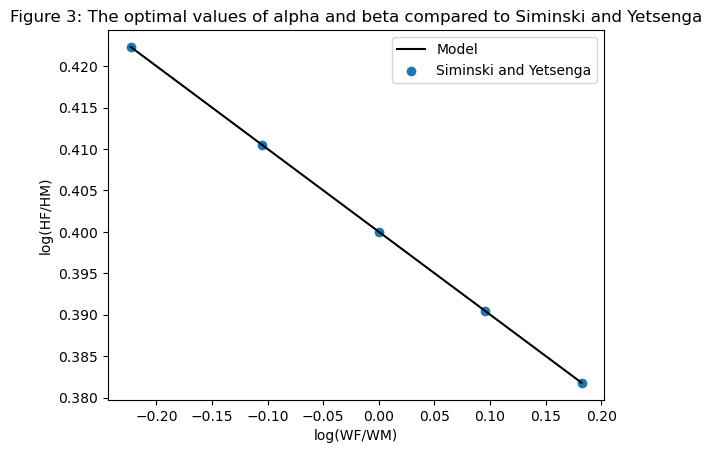

In [18]:
#Find the optimal alpha and sigma values with model.estimate
#Note that the runtime is about 15 seconds
model.estimate()
print(model.estimate())

#Redefine both of the lists
ratioH = []
ratioW =[]

#Use the code similar to the previous Questions, but manually add the optimal values of alpha and sigma
for wF in model.par.wF_vec:
    model.par.wF = wF
    model.par.alpha = 0.9820437278998275
    model.par.sigma = 0.09996069566441013
    results = model.solve()
    ratio_H = np.log(1e-8+results.HF/results.HM)
    ratioH = np.append(ratioH, ratio_H)
    ratio_W = np.log(wF/model.par.wM)
    ratioW = np.append(ratioW, ratio_W)


# Define Siminski and Yetsenga's findings with a lambda function
f = [0.4 + (-0.1) * x for x in ratioW]

#Plot the results with both our and Siminski and Yetsenga's results
plts = HSM.Figure()
plts.title = "Figure 3: The optimal values of alpha and beta compared to Siminski and Yetsenga"
plts.plot(ratioW, ratioH, f)


# Question 5

We can include human capital as an independent variable in the extension of the model because education and experience of individuals have an impact on wages as well. The article https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9842568/ finds that the difference in human capital between the genders explained 26 % of the wage gap back in 1980 and 8 % in 2010. The decrease in the wage gap was due to women being more educated and their extent of work experience. This finding concludes that the independent variable of human capital has an impact on the wages and should be accounted for when modelling gender difference in wage gap.

For the extension of the model, we will use the difference in wage gap between the genders in human capital of 8 % and plot it.

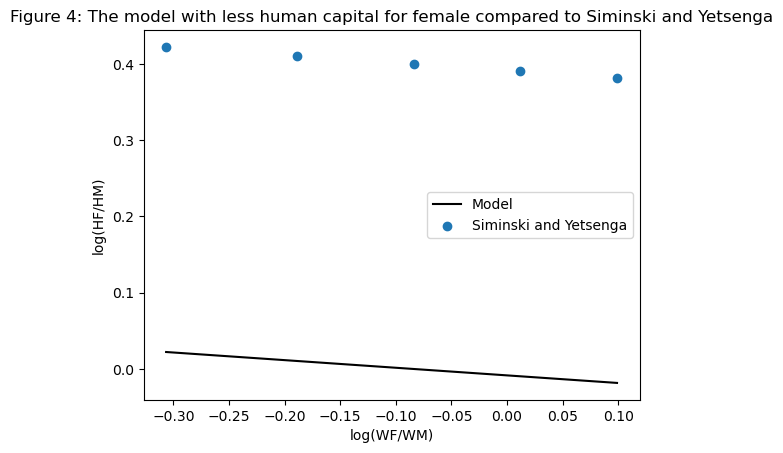

In [19]:
#Set alpha equal to 0.5
model.par.alpha = 0.5

#Repeat steps from the earlier versions of the model
ratioH = []
ratioW =[]

for wF in model.par.wF_vec:
    model.par.wF = wF
    results = model.solve()
    ratio_H = np.log(results.HF/results.HM)
    ratioH  = np.append(ratioH, ratio_H)
    #Make the 8% human capital difference part of the model by lowering the wage earned by the females
    #This is given the assumption that wage should equal the marginal product of labour
    ratio_W  = np.log(wF*0.92/model.par.wM)
    ratioW  = np.append(ratioW, ratio_W)

#Creating a graph with the new results and Siminski and Yetsenga
plts = HSM.Figure()
plts.title = "Figure 4: The model with less human capital for female compared to Siminski and Yetsenga"
plts.plot(ratioW, ratioH, f)


We observe that we get a to low b_0 under 0.1 

 
The article https://www.americanprogress.org/article/explaining-the-gender-wage-gap/ explains that the difference in the wage gap can be found in personal choice, whereas women are more likely to pick lower paid jobs like being a nurse or working as an administrative assistant whereas men tend to work as, truck drivers, managers and supervisors.